In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [7]:
rl_0 = pd.read_csv('ring_human.csv')
rl_1 = pd.read_csv('ring_stable/ring_21_1.csv')
tutorial = pd.read_csv('tutorial/emission.csv')

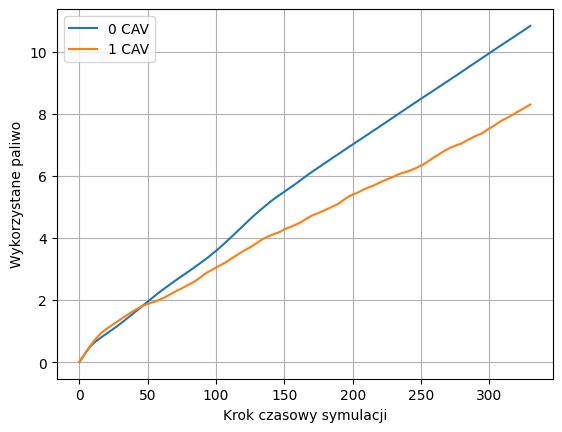

In [8]:
for i, frame in enumerate([rl_0, rl_1]):
    grouped = frame.groupby(by=['time']).sum().reset_index()
    grouped['fuel'] = grouped.fuel.cumsum()
    plt.plot(grouped['time'], grouped['fuel'], label=f"{i} CAV")
plt.legend(loc='best')
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Wykorzystane paliwo")
# plt.show()
plt.savefig('ring_fuel_consumption.png', dpi=300)

In [9]:
rl_0['fuel'].sum() / rl_1['fuel'].sum()

1.3051044065893247

In [12]:
rl_1['speed'].mean() / rl_0['speed'].mean()

1.5169324460033302

In [4]:
progress = pd.read_csv('ring_stable/progress.csv')

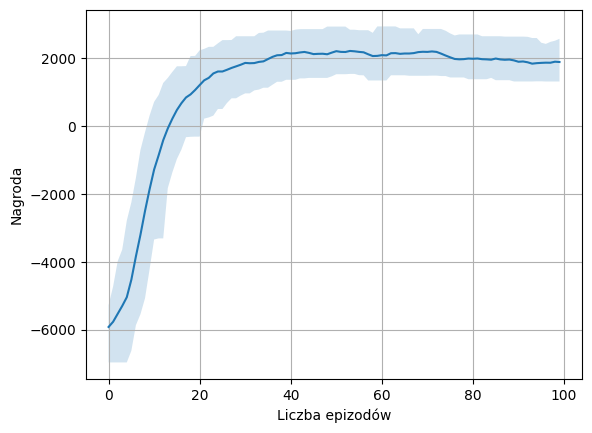

In [5]:

ax = sns.lineplot(progress['episode_reward_mean'])
ax.fill_between(progress.index, progress['episode_reward_min'], progress['episode_reward_max'], alpha=0.2)
ax.set(xlabel='Liczba epizodów', ylabel='Nagroda')
plt.grid()
ax.set(xlabel='Liczba epizodów', ylabel='Nagroda')
plt.savefig('ring_stable_progress.png', dpi=300)
# plt.show()

In [3]:

# progress = pd.read_csv('tutorial/progress.csv')

ax = sns.lineplot(progress['episode_reward_mean'])
ax.fill_between(progress.index, progress['episode_reward_min'], progress['episode_reward_max'], alpha=0.2)
ax.set(xlabel='Liczba epizodów', ylabel='Nagroda')
plt.grid()
plt.savefig('ring_tutorial_progress.png', dpi=300)
# plt.show()

KeyError: 'episode_reward_mean'

In [69]:
rl_0["id"].unique()

array(['human_0', 'human_1', 'human_2', 'human_3', 'human_4', 'human_5',
       'human_6', 'human_7', 'human_8', 'human_9', 'human_10', 'human_11',
       'human_12', 'human_13', 'human_14', 'human_15', 'human_16',
       'human_17', 'human_18', 'human_19', 'human_20', 'human_21'],
      dtype=object)

In [164]:
def cum_no_stopped_vehicles(csv):
    df = pd.DataFrame()
    pd.options.mode.chained_assignment = None
    for veh_id in csv["id"].unique():
        tmp = csv[csv['id'] == veh_id]
        a = tmp['speed'].to_numpy()
        a = [a[i] < 0.01 and a[i-1] > 0.01 for i in range(1, len(a))]
        a.append(False)
        tmp['speed'] = a
        df = pd.concat([df, tmp])
    tmp = csv.assign(stopped=df['speed'].to_numpy())
    tmp['stopped'] = tmp['stopped'].astype('int')
    tmp = tmp.groupby(by=['time']).sum().reset_index()
    tmp['stopped'] = tmp['stopped'].cumsum()
    return tmp
cum_no_stopped_vehicles(rl_0)


,time,x,y,speed,headway,target_accel_with_noise_with_failsafe,target_accel_no_noise_no_failsafe,target_accel_with_noise_no_failsafe,target_accel_no_noise_with_failsafe,realized_accel,road_grade,lane_number,distance,relative_position,leader_rel_speed,fuel,stopped
0,0.0,809.610203,825.211429,0.000000,120.4,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,576.900000,0.000000e+00,0.006558,0
1,0.1,809.609619,825.209647,1.884317,120.4,19.031601,18.890405,19.031601,18.890405,18.843169,0,0,0.188432,577.088432,-1.734723e-18,0.006578,0
2,0.2,809.604275,825.204935,3.717541,120.4,18.515558,18.619384,18.515558,18.619384,18.332236,0,0,0.560186,577.460186,-1.196959e-16,0.006596,0
3,0.3,809.594895,825.203952,5.478487,120.4,17.785559,18.345370,17.785559,18.345370,17.609465,0,0,1.108034,578.008034,3.122502e-16,0.006608,0
4,0.4,809.578886,825.205452,7.234497,120.4,17.735703,18.074131,17.735703,18.074131,17.560102,0,0,1.831484,578.731484,1.110223e-16,0.006625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,329.6,759.868350,1036.002388,52.886525,120.4,-2.441048,-2.235048,-2.441048,-2.235048,0.019688,0,0,20040.727767,572.827767,-4.440892e-16,0.003035,148
3297,329.7,762.687248,1036.485768,52.903786,120.4,-1.987278,-2.225079,-1.987278,-2.225079,0.172613,0,0,20046.018146,578.118146,0.000000e+00,0.002755,148
3298,329.8,765.501487,1036.934843,52.872916,120.4,-2.520313,-2.235704,-2.520313,-2.235704,-0.308701,0,0,20051.305437,583.405437,2.220446e-16,0.002734,148
3299,329.9,768.338789,1037.366220,52.863473,120.4,-2.157300,-2.215719,-2.157300,-2.215719,-0.094436,0,0,20056.591784,588.691784,-2.220446e-16,0.002788,148


In [ ]:
# plt.plot(rl_0['time'], cum_no_stopped_vehicles(rl_0))
t = rl_0.assign(stopped=cum_no_stopped_vehicles(rl_0).to_numpy())
t['stopped'] = t['stopped'].astype('int')
t = t.groupby(by=['time']).sum().reset_index()
t['stopped'] = t['stopped'].cumsum()
# t
plt.plot(t['time'], t['stopped'])

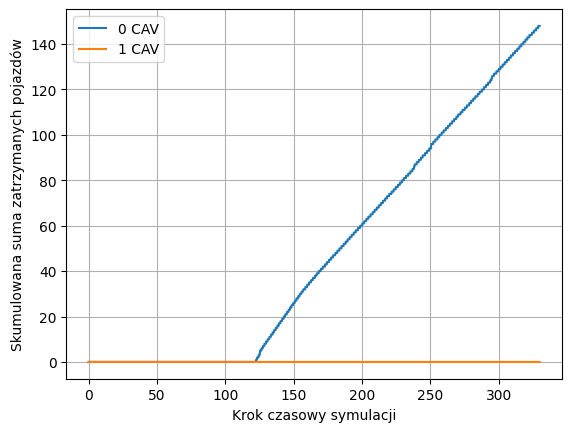

In [176]:
plt.plot(cum_no_stopped_vehicles(rl_0)['time'], cum_no_stopped_vehicles(rl_0)['stopped'], label="0 CAV")
plt.plot(cum_no_stopped_vehicles(rl_1)['time'], cum_no_stopped_vehicles(rl_1)['stopped'], label="1 CAV")
plt.legend(loc='best')
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Skumulowana suma zatrzymanych pojazdów")
# plt.show()
plt.savefig('ring_cum_no_stopped_vehicles.png', dpi=300)

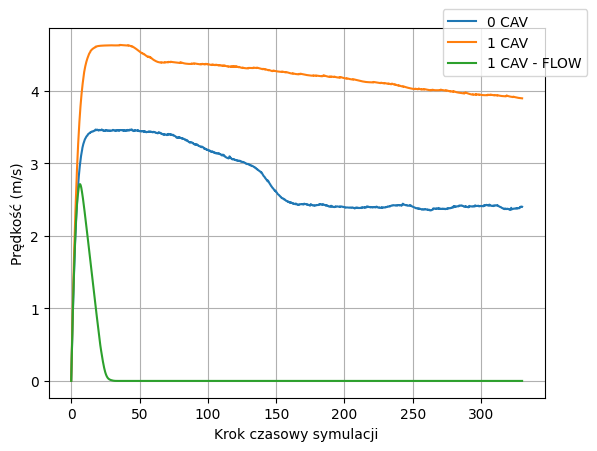

In [175]:
for i, frame in enumerate([rl_0, rl_1, tutorial]):
    grouped = frame.groupby(by=['time']).mean().reset_index()
    label =f"{i} CAV" if i != 2 else "1 CAV - FLOW"
    plt.plot(grouped['time'], grouped['speed'], label=label)
plt.legend(bbox_to_anchor=(1.1, 1.07))
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Prędkość (m/s)")
# plt.show()
plt.savefig('ring_velocity_benchmark.png', dpi=300)